In [3]:
import os
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import itertools
from typing import List, Tuple
import string
from os import walk
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,matthews_corrcoef,roc_curve, auc
import seaborn as sns

In [4]:
filenames = next(walk('/Users/rohan/Desktop/contact_map_analysis/kiba_cmaps/gt/'), (None, None, []))[2]

In [5]:
filenames

['P11802.npy',
 'P19784.npy',
 'P24941.npy',
 'P50750.npy',
 'Q16539.npy',
 'P67870.npy',
 'P06493.npy',
 'P17612.npy',
 'P68400.npy',
 'P28482.npy',
 'Q00535.npy',
 'P27361.npy',
 'O43741.npy']

In [6]:
def getCmaps(file,path):
    gt=np.load(path+'gt/'+file)
    esm=np.load(path+'esm_cmaps/'+file)
    alpha=np.load(path+'alpha_fold_cmaps/'+file)
    pcons=np.load(path+'pconsc4/'+file)
    pcons=pcons >= 0.5
    pcons=np.multiply(pcons,1)
    #rand=np.load(path+'esm/'+file)
    rand=np.load(path+'rand_cmaps/'+file)
    return gt,alpha,esm,pcons,rand

In [7]:
gt,alpha,esm,pcons,rand=getCmaps('Q00535.npy','/Users/rohan/Desktop/contact_map_analysis/kiba_cmaps/')

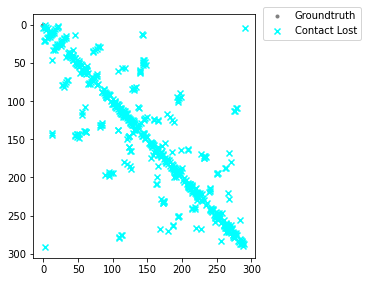

In [7]:
fig = plt.figure()
# esm_flatten=esm.flatten()
# gt_flatten=gt.flatten()
# acc,f1=accuracy_score(contact_pdb_flatten,esm_flatten),f1_score(contact_pdb_flatten,esm_flatten)
#         print("F1")
#         print(f1)
gts=np.where(gt == 1)
gc=np.where(gt-esm == -1)
lc=np.where(esm-gt== -1)

scatter1 = plt.scatter(gt[0],gt[1],c='grey',marker=".",label="Groundtruth")
scatter2 = plt.scatter(lc[0],lc[1],c='cyan', marker="x", label="Contact Lost")
# scatter3=plt.scatter(gc[0],gc[1],c='magenta', marker="o",label="Contact Gain")

plt.legend(loc='upper right',bbox_to_anchor=(1.5,1.05))
ax1 = scatter1.axes
ax1.invert_yaxis()
# ax2 = scatter2.axes
# ax2.invert_yaxis()
fig.tight_layout()

In [8]:
gts

(array([  0,   1,   2,   2,   2,   3,   3,   3,   4,   4,   5,   6,   6,
          7,   8,   8,   9,  10,  10,  10,  10,  11,  12,  12,  13,  13,
         13,  13,  14,  14,  15,  15,  15,  15,  16,  17,  17,  18,  18,
         19,  19,  19,  20,  21,  21,  21,  22,  22,  23,  24,  25,  25,
         25,  27,  27,  27,  27,  28,  29,  29,  29,  29,  31,  31,  31,
         32,  33,  33,  33,  34,  35,  35,  37,  37,  38,  39,  40,  40,
         41,  42,  42,  43,  43,  43,  44,  45,  45,  45,  45,  46,  46,
         46,  47,  48,  48,  49,  49,  49,  50,  51,  51,  52,  52,  52,
         52,  52,  53,  54,  55,  56,  56,  56,  57,  58,  58,  58,  59,
         59,  60,  60,  60,  61,  61,  61,  62,  62,  62,  63,  63,  63,
         64,  64,  65,  66,  67,  68,  68,  69,  70,  70,  71,  72,  72,
         73,  73,  75,  75,  75,  76,  77,  77,  77,  77,  77,  78,  79,
         79,  79,  79,  81,  81,  82,  83,  84,  84,  85,  85,  87,  87,
         88,  89,  89,  89,  90,  90,  91,  91,  92

In [9]:
gt

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
gt1=gt.flatten()

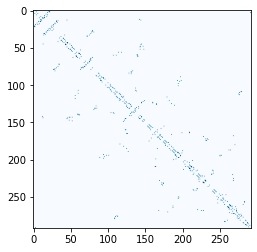

In [43]:
plt.imshow(gt,cmap='Blues')

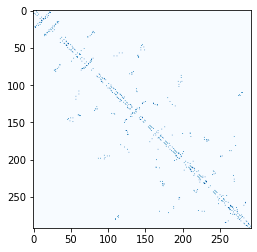

In [44]:
plt.imshow(alpha,cmap='Blues')

ValueError: range(0, 85264) is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

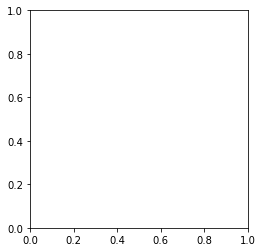

In [14]:
plt.imshow(gt1,range(0,len(gt1)))

In [15]:
len(gt1)

85264

In [17]:
gt1

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
unique, counts =np.unique(gt1, return_counts=True)

In [22]:
unique

array([0, 1])

In [23]:
counts

array([84680,   584])

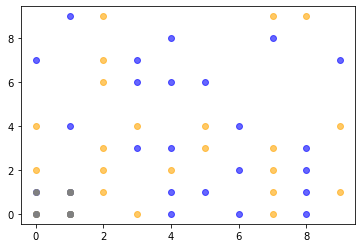

In [38]:
import numpy as np
import matplotlib.pyplot as plt

G = np.random.randint(0, 2, (10, 10))
P = np.random.randint(0, 2, (10, 10))

# Calculate X and Y
X = np.where(np.logical_and(G==1, P==0), 1, 0)
Y = np.where(np.logical_and(G==0, P==1), 1, 0)

x_indices = np.argwhere(X == 1)
y_indices = np.argwhere(Y == 1)

fig, ax = plt.subplots()
ax.scatter(x_indices[:, 0], x_indices[:, 1], color='orange', alpha=0.6)
ax.scatter(y_indices[:, 0], y_indices[:, 1], color='blue', alpha=0.6)
ax.scatter(G[:,0],G[:,1], color='gray', alpha=1)
#ax.imshow(G, cmap='gray', alpha=1)
plt.show()


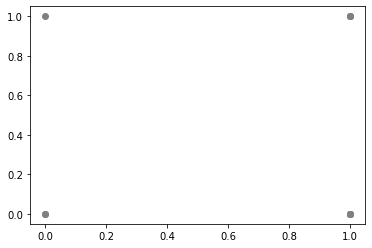

In [39]:
plt.scatter(G[:,0],G[:,1], color='gray', alpha=1)

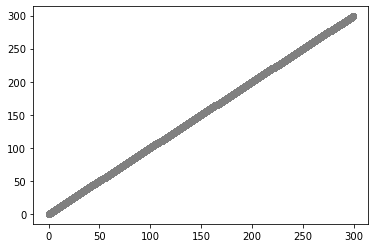

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Generate the two binary matrices G and P
G = np.random.randint(2, size=(300, 300))
P = np.random.randint(2, size=(300, 300))

# Calculate X and Y
X = np.where(np.logical_and(G==1, P==0), 1, 0)
Y = np.where(np.logical_and(G==0, P==1), 1, 0)

# Create a scatter plot
plt.scatter(np.argwhere(G == 1), np.argwhere(G == 1), c='gray', alpha=1)
#plt.scatter(np.argwhere(X == 1), np.argwhere(X == 1), c='orange', alpha=0.6)
#plt.scatter(np.argwhere(Y == 1), np.argwhere(Y == 1), c='blue', alpha=0.6)

plt.show()

In [33]:
G

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 1, 0],
       [0, 1, 0, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 1, 1]])

In [34]:
P

array([[0, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 1, ..., 0, 1, 0],
       [1, 1, 0, ..., 1, 0, 1],
       [1, 0, 1, ..., 1, 1, 1]])

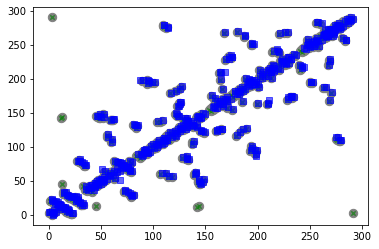

In [66]:
G=gt
P=alpha
# Calculate X and Y
X = np.where(np.logical_and(G==1, P==0), 1, 0)
Y = np.where(np.logical_and(G==0, P==1), 1, 0)

# Create a scatter plot
x_indices = np.argwhere(X == 1)
y_indices = np.argwhere(Y == 1)
g_indices=np.argwhere(G == 1)
fig, ax = plt.subplots()
ax.scatter(g_indices[:,0],g_indices[:,1], color='gray',s=70,marker="o", alpha=1)
ax.scatter(x_indices[:, 0], x_indices[:, 1], color='green', s=20,marker="x", alpha=0.6)
ax.scatter(y_indices[:, 0], y_indices[:, 1], color='blue', s=30,marker='s', alpha=0.6)
#ax.scatter(g_indices[:,0],g_indices[:,1], color='gray', alpha=1)
#ax.imshow(G, cmap='gray', alpha=1)
plt.show()


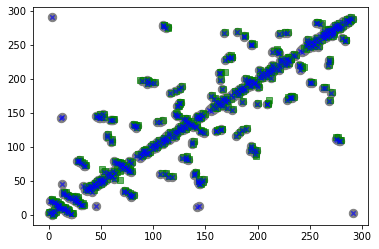

In [42]:
G=gt
P=alpha
# Calculate X and Y
X = np.where(np.logical_and(G==1, P==0), 1, 0)
Y = np.where(np.logical_and(G==0, P==1), 1, 0)

# Create a scatter plot
x_indices = np.argwhere(X == 1)
y_indices = np.argwhere(Y == 1)
g_indices=np.argwhere(G == 1)
fig, ax = plt.subplots()
ax.scatter(g_indices[:,0],g_indices[:,1], color='gray',s=70,marker="o", alpha=1)

ax.scatter(y_indices[:, 0], y_indices[:, 1], color='green', s=30,marker='s', alpha=0.6)
ax.scatter(x_indices[:, 0], x_indices[:, 1], color='blue', s=20,marker="x", alpha=0.6)
#ax.scatter(g_indices[:,0],g_indices[:,1], color='gray', alpha=1)
#ax.imshow(G, cmap='gray', alpha=1)
plt.show()


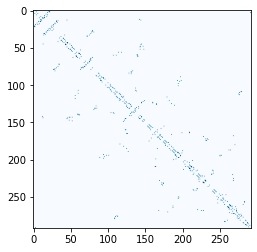

In [22]:
plt.imshow(gt,cmap='Blues')

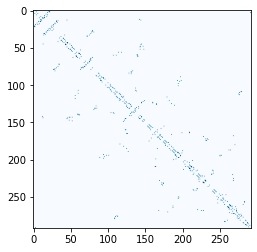

In [23]:
plt.imshow(gt,cmap='Blues')

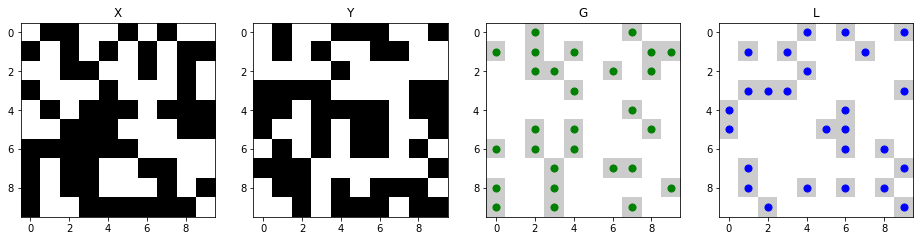

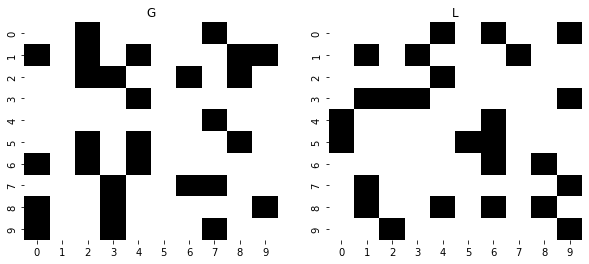

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create two 2D binary matrices X and Y
X = np.random.choice([0, 1], size=(10, 10))
Y = np.random.choice([0, 1], size=(10, 10))

# Calculate the differences
G = np.where((X == 1) & (Y == 0), 1, 0)
L = np.where((X == 0) & (Y == 1), 1, 0)

# Create subplots with Matplotlib
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

# Plot X
axs[0].imshow(X, cmap='binary')
axs[0].set_title('X')

# Plot Y
axs[1].imshow(Y, cmap='binary')
axs[1].set_title('Y')

# Plot G
x_indices = np.argwhere(G == 1)
axs[2].scatter(x_indices[:, 1], x_indices[:, 0], color='green', s=50)
axs[2].imshow(G, cmap='binary', alpha=0.2)
axs[2].set_title('G')

# Plot L
x_indices = np.argwhere(L == 1)
axs[3].scatter(x_indices[:, 1], x_indices[:, 0], color='blue', s=50)
axs[3].imshow(L, cmap='binary', alpha=0.2)
axs[3].set_title('L')

plt.show()

# Create subplots with Seaborn
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot G with Seaborn
sns.heatmap(G, cmap='binary', ax=axs[0], cbar=False)
axs[0].set_title('G')

# Plot L with Seaborn
sns.heatmap(L, cmap='binary', ax=axs[1], cbar=False)
axs[1].set_title('L')

plt.show()


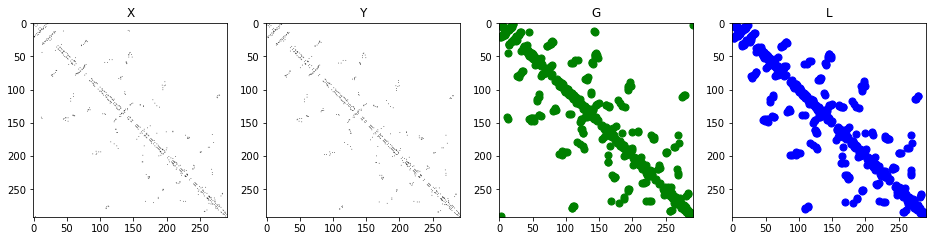

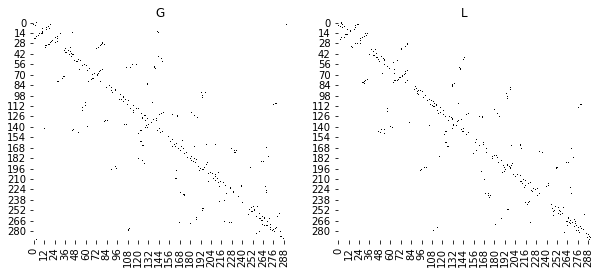

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create two 2D binary matrices X and Y
X = gt
Y = alpha

# Calculate the differences
G = np.where((X == 1) & (Y == 0), 1, 0)
L = np.where((X == 0) & (Y == 1), 1, 0)

# Create subplots with Matplotlib
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

# Plot X
axs[0].imshow(X, cmap='binary')
axs[0].set_title('X')

# Plot Y
axs[1].imshow(Y, cmap='binary')
axs[1].set_title('Y')

# Plot G
x_indices = np.argwhere(G == 1)
axs[2].scatter(x_indices[:, 1], x_indices[:, 0], color='green', s=50)
axs[2].imshow(G, cmap='binary', alpha=0.2)
axs[2].set_title('G')

# Plot L
x_indices = np.argwhere(L == 1)
axs[3].scatter(x_indices[:, 1], x_indices[:, 0], color='blue', s=50)
axs[3].imshow(L, cmap='binary', alpha=0.2)
axs[3].set_title('L')

plt.show()

# Create subplots with Seaborn
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot G with Seaborn
sns.heatmap(G, cmap='binary', ax=axs[0], cbar=False)
axs[0].set_title('G')

# Plot L with Seaborn
sns.heatmap(L, cmap='binary', ax=axs[1], cbar=False)
axs[1].set_title('L')

plt.show()


In [40]:
X.flatten()[1000:2000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [41]:
Y.flatten()[1000:2000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [37]:
L.sum()

472

In [33]:
Y.shape

(292, 292)

In [53]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [54]:
Y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

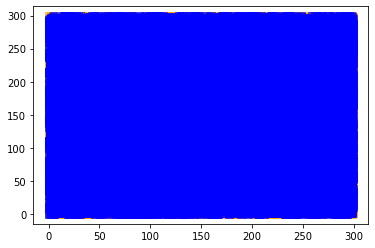

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Generate the two binary matrices G and P
G = np.random.randint(2, size=(300, 300))
P = np.random.randint(2, size=(300, 300))

# Calculate X and Y
X = np.where(np.logical_and(G==1, P==0), 1, 0)
Y = np.where(np.logical_and(G==0, P==1), 1, 0)

# Create a scatter plot
plt.scatter(np.argwhere(G == 1)[:,1], np.argwhere(G == 1)[:,0], c='gray', alpha=1, marker='s', s=10)
plt.scatter(np.argwhere(X == 1)[:,1], np.argwhere(X == 1)[:,0], c='orange', alpha=0.6, marker='s', s=50)
plt.scatter(np.argwhere(Y == 1)[:,1], np.argwhere(Y == 1)[:,0], c='blue', alpha=0.6, marker='s', s=50)

plt.show()
